In [2]:
import pandas as pd
import numpy as np
import operator
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import statsmodels.api as sm
#import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
#dataset containing sales transactions
ConsumerElectronics = pd.read_csv("./ConsumerElectronics.csv")

C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\4254553577.py:2: DtypeWarning: Columns (6,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  ConsumerElectronics = pd.read_csv("./ConsumerElectronics.csv")


In [5]:
ConsumerElectronics[1:5]

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [6]:
#Set values into a normal format other than the shown Exponential form
pd.set_option('display.float_format', '{:0.2f}'.format)

In [7]:
ConsumerElectronics[1:5]

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200.00,1420830839915200.00,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800.00,2421912925714800.00,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400.00,4416592101738400.00,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400.00,4419525153426400.00,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [8]:
ConsumerElectronics.describe()

,Year,Month,order_id,order_item_id,units,sla,product_mrp,product_procurement_sla
count,1648824.00,1648824.00,1648824.00,1648824.00,1648824.00,1648824.00,1648824.00,1648824.00
mean,2015.52,6.59,2842444674146622.00,13756277530325592.00,1.02,5.69,4108.31,5.40
std,0.50,3.62,1269134332596903.50,55945981798628056.00,0.25,2.98,8510.92,53.47
min,2015.00,1.00,76331515.00,108016495.00,1.00,0.00,0.00,-1.00
25%,2015.00,3.00,1602588503969575.00,1606725138262300.00,1.00,4.00,799.00,1.00
50%,2016.00,6.00,2611824528743350.00,2619185472741150.00,1.00,6.00,1599.00,2.00
75%,2016.00,10.00,3610613539366250.00,4397705931628400.00,1.00,7.00,3499.00,3.00
max,2016.00,12.00,5395076790260600.00,300037347717704000.00,50.00,1006.00,299999.00,1000.00


In [9]:
# Renaming some of the columns 
ConsumerElectronics.rename(columns={"FSN_ID": "FSN_ID", "Order_date": "Order_date", "Order_id": "Order_id", "Order_item_id": "Order_item_id", "s1_fact.order_payment_type	": "payment_mode", "SLA" : "Procurement_SLA" })

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3419300926147000.00,3419300926147000.00,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200.00,1420830839915200.00,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800.00,2421912925714800.00,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400.00,4416592101738400.00,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400.00,4419525153426400.00,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648819,VPLEYAP3ZYYUVESU,2015-09-27 19:20:31,2015,9,4402170060025800.00,4402170060025800.00,2200,1,\N,\N,COD,7,-9.90634340213633E+017,7.89475898877674E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2
1648820,VPLEYAP3ZYYUVESU,2015-09-28 01:32:58,2015,9,1402393217090200.00,1402393217090200.00,2098,1,\N,\N,COD,10,3.04892345453077E+018,-1.45758574108572E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2
1648821,VPLEYAP3ZYYUVESU,2015-09-29 07:07:57,2015,9,4403459511294400.00,4403459511294400.00,2098,1,\N,\N,COD,5,-4.53140379455183E+018,5.74649014721365E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2
1648822,VPLEYAP3ZYYUVESU,2015-09-29 18:15:45,2015,9,4403860318235600.00,4403860318235600.00,2200,1,\N,\N,COD,3,-8.94046418180233E+018,2.57294814079718E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2


In [10]:
ConsumerElectronics.describe(include='all')

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
count,1648824,1648824,1648824.00,1648824.00,1648824.00,1648824.00,1648824.00,1648824.00,1648824,1648824,1648824,1648824.00,1648824,1648824.00,1648824,1648824,1648824,1648824,1648824.00,1648824.00
unique,21219,1155192,NaN,NaN,NaN,NaN,18086.00,NaN,143,171,2,NaN,1253495,12973.00,1,5,14,74,NaN,NaN
top,ACCE6VGHYKYFX4WB,2016-04-27 00:19:27,NaN,NaN,NaN,NaN,999.00,NaN,\N,\N,COD,NaN,,-9031043207091489792.00,CE,EntertainmentSmall,Speaker,LaptopSpeaker,NaN,NaN
freq,37622,294,NaN,NaN,NaN,NaN,23738.00,NaN,1312972,1312971,1191443,NaN,4904,7743.00,1648824,944698,543928,287850,NaN,NaN
mean,NaN,NaN,2015.52,6.59,2842444674146622.00,13756277530325592.00,NaN,1.02,NaN,NaN,NaN,5.69,NaN,NaN,NaN,NaN,NaN,NaN,4108.31,5.40
std,NaN,NaN,0.50,3.62,1269134332596903.50,55945981798628056.00,NaN,0.25,NaN,NaN,NaN,2.98,NaN,NaN,NaN,NaN,NaN,NaN,8510.92,53.47
min,NaN,NaN,2015.00,1.00,76331515.00,108016495.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,-1.00
25%,NaN,NaN,2015.00,3.00,1602588503969575.00,1606725138262300.00,NaN,1.00,NaN,NaN,NaN,4.00,NaN,NaN,NaN,NaN,NaN,NaN,799.00,1.00
50%,NaN,NaN,2016.00,6.00,2611824528743350.00,2619185472741150.00,NaN,1.00,NaN,NaN,NaN,6.00,NaN,NaN,NaN,NaN,NaN,NaN,1599.00,2.00
75%,NaN,NaN,2016.00,10.00,3610613539366250.00,4397705931628400.00,NaN,1.00,NaN,NaN,NaN,7.00,NaN,NaN,NaN,NaN,NaN,NaN,3499.00,3.00


In [11]:
pd.value_counts(ConsumerElectronics['gmv'].values, sort=False)

6400      18
6900      83
1990     418
1690     229
1618      10
        ... 
3857       2
3766       2
2686      26
12330      2
3225       2
Length: 18086, dtype: int64

In [12]:
#Convert date format
ConsumerElectronics['order_date_c']=pd.to_datetime(ConsumerElectronics['order_date'])

In [13]:
ConsumerElectronics['order_date'].head()

0    2015-10-17 15:11:54
1    2015-10-19 10:07:22
2    2015-10-20 15:45:56
3    2015-10-14 12:05:15
4    2015-10-17 21:25:03
Name: order_date, dtype: object

In [14]:
ConsumerElectronics['order_date_c'].head()

0   2015-10-17 15:11:54
1   2015-10-19 10:07:22
2   2015-10-20 15:45:56
3   2015-10-14 12:05:15
4   2015-10-17 21:25:03
Name: order_date_c, dtype: datetime64[ns]

In [15]:
#Extract the week number
ConsumerElectronics['week_year']=ConsumerElectronics['order_date_c'].dt.isocalendar().week

In [16]:
ConsumerElectronics['week_year'].head()


0    42
1    43
2    43
3    42
4    42
Name: week_year, dtype: UInt32

In [17]:
ConsumerElectronics['order_date_c'].head()

0   2015-10-17 15:11:54
1   2015-10-19 10:07:22
2   2015-10-20 15:45:56
3   2015-10-14 12:05:15
4   2015-10-17 21:25:03
Name: order_date_c, dtype: datetime64[ns]

In [18]:
#Select data only from week 28 2015 to week 26 2016
ConsumerElectronics = ConsumerElectronics[((ConsumerElectronics.Year ==2016) & (ConsumerElectronics.week_year <=26)) | ((ConsumerElectronics.Year ==2015) & (ConsumerElectronics.week_year >=28))]

In [19]:
#Adding 53 to the week nimber of 2016 so as to sort it easily
ConsumerElectronics['week_year']=np.where((operator.and_(ConsumerElectronics['week_year']<=26, ConsumerElectronics['Year']==2016)),ConsumerElectronics['week_year']+53,ConsumerElectronics['week_year'])

In [20]:
np.sort(ConsumerElectronics['week_year'].unique())

array([28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61,
       62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78,
       79], dtype=object)

In [21]:
#MRP

In [22]:
min(ConsumerElectronics['product_mrp'])

0

In [23]:
ConsumerElectronics=ConsumerElectronics[ConsumerElectronics['product_mrp']>0]

In [24]:
min(ConsumerElectronics['product_mrp'])

49

In [25]:
sum(ConsumerElectronics['product_mrp'].isna())

0

In [26]:
#GMV

In [27]:
#set al values of 0 in gmv to 1
ConsumerElectronics.gmv[ConsumerElectronics.gmv==0]=1
ConsumerElectronics.gmv[ConsumerElectronics.gmv==" "]=1

C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\466029716.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ConsumerElectronics.gmv[ConsumerElectronics.gmv==" "]=1


In [28]:
ConsumerElectronics.gmv[ConsumerElectronics.gmv==0]

Series([], Name: gmv, dtype: object)

In [29]:
ConsumerElectronics.shape

(1629389, 22)

In [30]:
#Removing records where items are sold more than MRP - Ex: Bulk to individuals

In [31]:
ConsumerElectronics=ConsumerElectronics[pd.to_numeric(ConsumerElectronics.product_mrp*ConsumerElectronics.units)>=pd.to_numeric(ConsumerElectronics.gmv)]

In [32]:
ConsumerElectronics.shape

(1596124, 22)

In [33]:
ConsumerElectronics[1:5]

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_date_c,week_year
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200.00,1420830839915200.00,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-19 10:07:22,43
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800.00,2421912925714800.00,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-20 15:45:56,43
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400.00,4416592101738400.00,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-14 12:05:15,42
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400.00,4419525153426400.00,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-17 21:25:03,42


In [34]:
# subset data for one category - GamingAccessory

In [35]:
ConsumerElectronics.rename(columns={"s1_fact.order_payment_type": "payment_method"})

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,payment_method,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_date_c,week_year
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3419300926147000.00,3419300926147000.00,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-17 15:11:54,42
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200.00,1420830839915200.00,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-19 10:07:22,43
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800.00,2421912925714800.00,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-20 15:45:56,43
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400.00,4416592101738400.00,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-14 12:05:15,42
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400.00,4419525153426400.00,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-17 21:25:03,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648819,VPLEYAP3ZYYUVESU,2015-09-27 19:20:31,2015,9,4402170060025800.00,4402170060025800.00,2200,1,\N,\N,COD,7,-9.90634340213633E+017,7.89475898877674E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,2015-09-27 19:20:31,39
1648820,VPLEYAP3ZYYUVESU,2015-09-28 01:32:58,2015,9,1402393217090200.00,1402393217090200.00,2098,1,\N,\N,COD,10,3.04892345453077E+018,-1.45758574108572E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,2015-09-28 01:32:58,40
1648821,VPLEYAP3ZYYUVESU,2015-09-29 07:07:57,2015,9,4403459511294400.00,4403459511294400.00,2098,1,\N,\N,COD,5,-4.53140379455183E+018,5.74649014721365E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,2015-09-29 07:07:57,40
1648822,VPLEYAP3ZYYUVESU,2015-09-29 18:15:45,2015,9,4403860318235600.00,4403860318235600.00,2200,1,\N,\N,COD,3,-8.94046418180233E+018,2.57294814079718E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,2015-09-29 18:15:45,40


In [36]:
ConsumerElectronics_camera = ConsumerElectronics[ConsumerElectronics.product_analytic_sub_category == "CameraAccessory"]

In [37]:
ConsumerElectronics_camera.shape

(229437, 22)

In [38]:
pd.options.mode.chained_assignment = None  

In [39]:
#Forming new variables and formatting

In [40]:
ConsumerElectronics_camera['gmv']=pd.to_numeric(ConsumerElectronics_camera['gmv'])
ConsumerElectronics_camera['list_price']=ConsumerElectronics_camera['gmv']/ConsumerElectronics_camera['units']
ConsumerElectronics_camera['discount_offered']=(ConsumerElectronics_camera['product_mrp']-ConsumerElectronics_camera['list_price'])/ConsumerElectronics_camera['product_mrp']

In [41]:
ConsumerElectronics_camera [1:5]

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_date_c,week_year,list_price,discount_offered
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200.00,1420830839915200.00,6900.00,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-19 10:07:22,43,6900.00,0.04
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800.00,2421912925714800.00,1990.00,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-20 15:45:56,43,1990.00,0.05
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400.00,4416592101738400.00,1690.00,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-14 12:05:15,42,1690.00,0.19
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400.00,4419525153426400.00,1618.00,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-17 21:25:03,42,1618.00,0.23


In [42]:
ConsumerElectronics_camera['s1_fact.order_payment_type'].value_counts()

COD        159702
Prepaid     69735
Name: s1_fact.order_payment_type, dtype: int64

In [43]:
ConsumerElectronics_camera['Prepaid_ind'] = np.where(ConsumerElectronics_camera['s1_fact.order_payment_type']=='Prepaid', 1, 0)

In [44]:
ConsumerElectronics_camera.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_date_c,week_year,list_price,discount_offered,Prepaid_ind
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3419300926147000.00,3419300926147000.00,6400.00,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-17 15:11:54,42,6400.00,0.11,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200.00,1420830839915200.00,6900.00,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-19 10:07:22,43,6900.00,0.04,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800.00,2421912925714800.00,1990.00,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-20 15:45:56,43,1990.00,0.05,0
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400.00,4416592101738400.00,1690.00,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-14 12:05:15,42,1690.00,0.19,1
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400.00,4419525153426400.00,1618.00,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-17 21:25:03,42,1618.00,0.23,1


In [45]:
#Finding the percentage contribution of perpaid sales as total number of units sold

In [46]:
perc_cal=ConsumerElectronics_camera.groupby(['week_year']).agg({'Prepaid_ind': ['sum','count']})
perc_cal.columns.values.tolist()

[('Prepaid_ind', 'sum'), ('Prepaid_ind', 'count')]

In [47]:
perc_cal.head()

Prepaid_ind      
                  sum count
week_year                  
28                955  2841
29               1049  3048
30                997  3019
31                621  2009
32                  0     2

In [48]:
#Calculating the percentage. Aggregated at week_year level
prepaid_perc=perc_cal['Prepaid_ind','sum'].values/perc_cal['Prepaid_ind','count'].values

In [49]:
prepaid_perc=perc_cal['Prepaid_ind','sum'].values/perc_cal['Prepaid_ind','count'].values

In [50]:
ConsumerElectronics_camera_agg=ConsumerElectronics_camera.groupby(['week_year']).agg({'list_price': ['mean'],'gmv':['mean'], 'units':['mean'], 'sla': ['mean'], 'discount_offered': ['mean'], 'product_procurement_sla': ['mean'], 'Year': ['mean'], 'Month': ['mean'] })


In [51]:
ConsumerElectronics_camera_agg.head()

,list_price,gmv,units,sla,discount_offered,product_procurement_sla,Year,Month
,mean,mean,mean,mean,mean,mean,mean,mean
week_year,,,,,,,,
28,1352.95,1370.80,1.05,7.05,0.46,2.75,2015.00,7.00
29,1465.56,1484.06,1.03,6.38,0.46,2.78,2015.00,7.00
30,1419.59,1449.31,1.04,6.41,0.45,2.83,2015.00,7.00
31,1435.37,1456.43,1.05,6.38,0.44,2.79,2015.00,7.00
32,699.00,699.00,1.00,5.00,0.52,4.00,2015.00,8.00


In [52]:
#Creating the key variable 'week_year' for joining with other datasets
# Renaming the columns
ConsumerElectronics_camera_agg.columns = ['list_price','gmv','units','sla','discount_offered','product_procurement_sla','Year','Month']
# Creating the key variable 'week_year' for joining with other datasets
ConsumerElectronics_camera_agg['week_year']=ConsumerElectronics_camera_agg.index
# Rounding off the month
ConsumerElectronics_camera_agg['Month']=round(ConsumerElectronics_camera_agg['Month'],0)

In [53]:
ConsumerElectronics_camera_agg.head()

,list_price,gmv,units,sla,discount_offered,product_procurement_sla,Year,Month,week_year
week_year,,,,,,,,,
28,1352.95,1370.80,1.05,7.05,0.46,2.75,2015.00,7.00,28
29,1465.56,1484.06,1.03,6.38,0.46,2.78,2015.00,7.00,29
30,1419.59,1449.31,1.04,6.41,0.45,2.83,2015.00,7.00,30
31,1435.37,1456.43,1.05,6.38,0.44,2.79,2015.00,7.00,31
32,699.00,699.00,1.00,5.00,0.52,4.00,2015.00,8.00,32


In [54]:
#Investment Dataset

In [55]:
investment = pd.read_csv('investments_data.csv')

In [56]:
investment.head()

,year,month,Total_investment,TV,Digital,Sponsorship,Content_marketing,Online_marketing,Affiliates,SEM,Radio,Other,nps,Stock_Index
0,2015,7,17.10,0.20,2.50,7.40,0.00,1.30,0.50,5.00,NaN,NaN,54.60,1177
1,2015,8,5.10,0.00,1.30,1.10,0.00,0.10,0.10,2.50,NaN,NaN,60.00,1206
2,2015,9,96.30,3.90,1.40,62.80,0.60,16.40,5.00,6.20,NaN,NaN,46.90,1101
3,2015,10,170.20,6.10,12.60,84.70,3.40,24.40,7.00,31.90,NaN,NaN,44.40,1210
4,2015,11,51.20,4.20,1.30,14.20,0.20,19.60,6.60,5.20,NaN,NaN,47.00,1233


In [57]:
columns = investment.columns

In [58]:
investment = investment.loc[:,['year','month','Total_investment', 'TV', 'Digital', 'Sponsorship', 'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'nps', 'Stock_Index']]

In [59]:
investment.head()

,year,month,Total_investment,TV,Digital,Sponsorship,Content_marketing,Online_marketing,Affiliates,SEM,nps,Stock_Index
0,2015,7,17.10,0.20,2.50,7.40,0.00,1.30,0.50,5.00,54.60,1177
1,2015,8,5.10,0.00,1.30,1.10,0.00,0.10,0.10,2.50,60.00,1206
2,2015,9,96.30,3.90,1.40,62.80,0.60,16.40,5.00,6.20,46.90,1101
3,2015,10,170.20,6.10,12.60,84.70,3.40,24.40,7.00,31.90,44.40,1210
4,2015,11,51.20,4.20,1.30,14.20,0.20,19.60,6.60,5.20,47.00,1233


In [60]:
corr = investment.corr()
corr.style.background_gradient(cmap='coolwarm')

,year,month,Total_investment,TV,Digital,Sponsorship,Content_marketing,Online_marketing,Affiliates,SEM,nps,Stock_Index
year,1.000000,-0.869048,-0.091077,0.155425,-0.388589,-0.293311,-0.239675,0.258331,0.319980,-0.360048,-0.054212,-0.012433
month,-0.869048,1.000000,0.234847,-0.043148,0.392445,0.473279,0.269707,-0.064250,-0.128192,0.419576,-0.170129,0.078332
Total_investment,-0.091077,0.234847,1.000000,0.710071,0.708917,0.899121,0.860018,0.753265,0.694639,0.811581,-0.818339,-0.337580
TV,0.155425,-0.043148,0.710071,1.000000,0.306223,0.549132,0.380395,0.625422,0.669278,0.350349,-0.591762,-0.543307
Digital,-0.388589,0.392445,0.708917,0.306223,1.000000,0.694983,0.899553,0.265926,0.188341,0.973189,-0.365392,0.101410
Sponsorship,-0.293311,0.473279,0.899121,0.549132,0.694983,1.000000,0.734325,0.495404,0.419455,0.771471,-0.657889,-0.242380
Content_marketing,-0.239675,0.269707,0.860018,0.380395,0.899553,0.734325,1.000000,0.582987,0.495040,0.957893,-0.612493,-0.054171
Online_marketing,0.258331,-0.064250,0.753265,0.625422,0.265926,0.495404,0.582987,1.000000,0.988907,0.435220,-0.886221,-0.214150
Affiliates,0.319980,-0.128192,0.694639,0.669278,0.188341,0.419455,0.495040,0.988907,1.000000,0.347755,-0.861605,-0.228392
SEM,-0.360048,0.419576,0.811581,0.350349,0.973189,0.771471,0.957893,0.435220,0.347755,1.000000,-0.520486,0.067102


In [61]:
# Affiliates is highly correlated with Online_marketing 
# SEM is highly correlated with Content_marketing (ρ = 0.95789) Rejected
# Removing variables based on dataset profiling multicollinearity output
investment_sht=investment.loc[:,['Content_marketing','Digital','month','nps','Sponsorship','Stock_Index','Total_investment','TV','year']]

In [62]:
# Renaming the datset for joining
investment_sht=investment_sht.rename(columns={"year": "Year","month":"Month"})

In [63]:
investment_sht.head()

,Content_marketing,Digital,Month,nps,Sponsorship,Stock_Index,Total_investment,TV,Year
0,0.00,2.50,7,54.60,7.40,1177,17.10,0.20,2015
1,0.00,1.30,8,60.00,1.10,1206,5.10,0.00,2015
2,0.60,1.40,9,46.90,62.80,1101,96.30,3.90,2015
3,3.40,12.60,10,44.40,84.70,1210,170.20,6.10,2015
4,0.20,1.30,11,47.00,14.20,1233,51.20,4.20,2015


In [64]:
#Joining investment with the aggregated sales data
ConsumerElectronics_camera_full=pd.merge(ConsumerElectronics_camera_agg,investment_sht,on=['Month','Year'])
ConsumerElectronics_camera_full.head()

,list_price,gmv,units,sla,discount_offered,product_procurement_sla,Year,Month,week_year,Content_marketing,Digital,nps,Sponsorship,Stock_Index,Total_investment,TV
0,1352.95,1370.80,1.05,7.05,0.46,2.75,2015.00,7.00,28,0.00,2.50,54.60,7.40,1177,17.10,0.20
1,1465.56,1484.06,1.03,6.38,0.46,2.78,2015.00,7.00,29,0.00,2.50,54.60,7.40,1177,17.10,0.20
2,1419.59,1449.31,1.04,6.41,0.45,2.83,2015.00,7.00,30,0.00,2.50,54.60,7.40,1177,17.10,0.20
3,1435.37,1456.43,1.05,6.38,0.44,2.79,2015.00,7.00,31,0.00,2.50,54.60,7.40,1177,17.10,0.20
4,699.00,699.00,1.00,5.00,0.52,4.00,2015.00,8.00,32,0.00,1.30,60.00,1.10,1206,5.10,0.00


In [65]:
#Climate Data

In [66]:
climate=pd.read_csv("./Ecom_climate.csv")

In [67]:
climate.head()

,DateTime,Year,Month,Day,Max_Temp,Min_Temp,Mean_Temp,Heat_DegDays,Cool_DegDays,TotalRain,TotalSnow,TotalPrecip,SnowonGrnd
0,2015-01-01,2015,1,1,0.00,-8.50,-4.30,22.30,0.00,0.00,0.00,0.00,0.00
1,2015-01-02,2015,1,2,3.00,-3.00,0.00,18.00,0.00,0.00,0.00,0.00,0.00
2,2015-01-03,2015,1,3,2.50,-4.00,-0.80,18.80,0.00,24.00,0.00,24.00,0.00
3,2015-01-04,2015,1,4,2.50,0.00,1.30,16.70,0.00,0.00,1.00,1.00,0.00
4,2015-01-05,2015,1,5,-10.00,-13.50,-11.80,29.80,0.00,0.00,3.00,3.00,1.00


In [154]:
corr = climate.corr()
corr.style.background_gradient(cmap='coolwarm')

,week_year,Cool_DegDays,Heat_DegDays,Max_Temp,SnowonGrnd,TotalPrecip,TotalSnow
week_year,1.000000,-0.259517,0.266487,-0.224127,0.044512,-0.030645,0.052453
Cool_DegDays,-0.259517,1.000000,-0.572061,0.752057,-0.143770,0.031256,-0.134950
Heat_DegDays,0.266487,-0.572061,1.000000,-0.938663,0.471663,0.070666,0.324918
Max_Temp,-0.224127,0.752057,-0.938663,1.000000,-0.372639,-0.044556,-0.299064
SnowonGrnd,0.044512,-0.143770,0.471663,-0.372639,1.000000,-0.040967,0.025178
TotalPrecip,-0.030645,0.031256,0.070666,-0.044556,-0.040967,1.000000,0.207208
TotalSnow,0.052453,-0.134950,0.324918,-0.299064,0.025178,0.207208,1.000000


In [68]:
climate['DateTime']=pd.to_datetime(climate['DateTime'])
climate['week_year']=climate['DateTime'].dt.isocalendar().week

In [69]:
climate_bot=climate[operator.and_(climate['week_year']<=26, climate['Year']==2016)]
climate_bot['week_year']=climate_bot['week_year']+53
climate_top=climate[operator.and_(climate['week_year']>=28, climate['Year']==2015)]
climate_bot.head()

,DateTime,Year,Month,Day,Max_Temp,Min_Temp,Mean_Temp,Heat_DegDays,Cool_DegDays,TotalRain,TotalSnow,TotalPrecip,SnowonGrnd,week_year
368,2016-01-04,2016,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54
369,2016-01-05,2016,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54
370,2016-01-06,2016,1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54
371,2016-01-07,2016,1,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54
372,2016-01-08,2016,1,8,7.00,-14.00,-3.50,21.50,0.00,9.00,0.00,9.00,0.00,54


In [70]:
#Combining the relevant climatic data and validation
climate=climate_bot.append(climate_top)
climate['week_year'].unique()

C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\1074053485.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  climate=climate_bot.append(climate_top)


<IntegerArray>
[54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Length: 52, dtype: UInt32

In [71]:
# Dropping unnecessary variables which are higly correlated and aggregating the data
# Note that we are not dropping the variables even though it has high percentage of missing values. The reason being we are 
# interested in the average value of the climate variables and not individual values. The other reason is, the climate 
# variables are less likely to change drastically. So, mean will represent approx climate data for the week. 
climate=climate.loc[:,['week_year','Cool_DegDays','Heat_DegDays','Max_Temp','SnowonGrnd','TotalPrecip','TotalSnow']]
climate_agg=climate.groupby(['week_year']).agg({'Cool_DegDays': ['mean'],'Heat_DegDays': ['mean'],'Max_Temp': ['mean'],'SnowonGrnd': ['mean'],'TotalPrecip': ['mean'],'TotalSnow': ['mean']})

In [72]:
climate_agg.head()

,Cool_DegDays,Heat_DegDays,Max_Temp,SnowonGrnd,TotalPrecip,TotalSnow
,mean,mean,mean,mean,mean,mean
week_year,,,,,,
28,2.38,0.28,24.83,0.00,4.42,0.00
29,5.18,0.00,28.75,0.00,1.40,0.00
30,5.06,0.00,29.75,0.00,0.90,0.00
31,6.57,0.00,31.58,0.00,4.63,0.00
32,3.65,0.00,27.20,0.00,0.28,0.00


In [73]:
#missing imputation for Cold
climate_agg['Cool_DegDays','mean'][climate_agg['Cool_DegDays','mean'].isna()]=0
#missing imputation for Heat
climate_agg['Heat_DegDays','mean'][climate_agg['Heat_DegDays','mean'].isna()]=21

In [74]:
prepaid_perc[:,]

array([0.33614924, 0.3441601 , 0.3302418 , 0.30910901, 0.        ,
       0.        , 0.8       , 0.30662139, 0.31366681, 0.30084613,
       0.28306513, 0.20683138, 0.25554514, 0.29721938, 0.23095309,
       0.22554933, 0.2248833 , 0.25523952, 0.24042485, 0.23284314,
       0.23756288, 0.24450812, 0.24375918, 0.28477976, 0.22870159,
       0.18918919, 0.2136685 , 0.25457047, 0.20908312, 0.20423573,
       0.22762545, 0.22071575, 0.19614711, 0.22451339, 0.29620253,
       0.22649385, 0.32357217, 0.54579162, 0.95847942, 0.96558054,
       0.94283381, 0.55195911, 0.20211338, 0.21690092, 0.21429955,
       0.24724265, 0.20480333, 0.19336614, 0.20995671, 0.22461171,
       0.20238095])

In [75]:
#Converting array to dataframe
prepaid_perc2 = pd.DataFrame({'prepaid_perc':prepaid_perc[:,]})
prepaid_perc2.head()

,prepaid_perc
0,0.34
1,0.34
2,0.33
3,0.31
4,0.00


In [76]:
climate_agg.index

Index([28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79], dtype='UInt32', name='week_year')

In [77]:
#Adding prepaid perc to the climatic information and creating week_year key for merging
climate_agg['week_year']=climate_agg.index
climate_agg.head()

,Cool_DegDays,Heat_DegDays,Max_Temp,SnowonGrnd,TotalPrecip,TotalSnow,week_year
,mean,mean,mean,mean,mean,mean,
week_year,,,,,,,
28,2.38,0.28,24.83,0.00,4.42,0.00,28
29,5.18,0.00,28.75,0.00,1.40,0.00,29
30,5.06,0.00,29.75,0.00,0.90,0.00,30
31,6.57,0.00,31.58,0.00,4.63,0.00,31
32,3.65,0.00,27.20,0.00,0.28,0.00,32


In [78]:
climate_agg1 = pd.concat([climate_agg.reset_index(drop=True), prepaid_perc2], axis=1)
climate_agg1.head()

,"(Cool_DegDays, mean)","(Heat_DegDays, mean)","(Max_Temp, mean)","(SnowonGrnd, mean)","(TotalPrecip, mean)","(TotalSnow, mean)","(week_year, )",prepaid_perc
0,2.38,0.28,24.83,0.00,4.42,0.00,28,0.34
1,5.18,0.00,28.75,0.00,1.40,0.00,29,0.34
2,5.06,0.00,29.75,0.00,0.90,0.00,30,0.33
3,6.57,0.00,31.58,0.00,4.63,0.00,31,0.31
4,3.65,0.00,27.20,0.00,0.28,0.00,32,0.00


In [79]:
#Creating data frame with the list of holidays given
holiday_list=pd.DataFrame([["2015-07-18"],
                           ["2015-07-19"],
                           ["2015-08-15"],
                           ["2015-08-16"],
                           ["2015-08-17"],
                           ["2015-08-28"],
                           ["2015-08-29"],
                           ["2015-08-30"],
                           ["2015-10-15"],
                           ["2015-10-16"],
                           ["2015-10-17"],
                           ["2015-11-07"],
                           ["2015-11-08"],
                           ["2015-11-09"],
                           ["2015-11-10"],
                           ["2015-10-11"],
                           ["2015-10-12"],
                           ["2015-11-13"],
                           ["2015-11-14"],
                           ["2015-12-25"],
                           ["2015-12-26"],
                           ["2015-12-27"],
                           ["2015-12-28"],
                           ["2015-12-29"],
                           ["2015-12-30"],
                           ["2016-01-01"],
                           ["2016-01-02"],
                           ["2016-01-03"],
                           ["2016-01-20"],
                           ["2016-01-21"],
                           ["2016-01-22"],
                           ["2016-02-01"],
                           ["2016-02-02"],
                           ["2016-02-20"],
                           ["2016-02-21"],
                           ["2016-02-14"],
                           ["2016-02-15"],
                           ["2016-03-07"],
                           ["2016-03-08"],
                           ["2016-03-09"],
                           ["2016-05-25"],
                           ["2016-05-26"],
                           ["2016-05-27"]], columns=['holiday_day'])

In [80]:
#Creating the holiday flag
holiday_list['holiday_day']=pd.to_datetime(holiday_list['holiday_day'])
holiday_list['week_year']=holiday_list['holiday_day'].dt.isocalendar().week
holiday_list

,holiday_day,week_year
0,2015-07-18,29
1,2015-07-19,29
2,2015-08-15,33
3,2015-08-16,33
4,2015-08-17,34
5,2015-08-28,35
6,2015-08-29,35
7,2015-08-30,35
8,2015-10-15,42
9,2015-10-16,42


In [81]:
holiday_list['week_year']=np.where(holiday_list['week_year']<=26,holiday_list['week_year']+53,holiday_list['week_year'])
holiday_list

,holiday_day,week_year
0,2015-07-18,29
1,2015-07-19,29
2,2015-08-15,33
3,2015-08-16,33
4,2015-08-17,34
5,2015-08-28,35
6,2015-08-29,35
7,2015-08-30,35
8,2015-10-15,42
9,2015-10-16,42


In [82]:
holiday_df=pd.DataFrame(holiday_list['week_year'].unique(),columns=['week_year'])
holiday_df['holiday_flag']=1
holiday_df.head()

,week_year,holiday_flag
0,29,1
1,33,1
2,34,1
3,35,1
4,42,1


In [83]:
#Creating the pay day flag
pay_list=pd.date_range('2015-07-01','2016-06-30', freq='SMS').strftime("%Y-%m-%d").tolist()
pay_list

['2015-07-01',
 '2015-07-15',
 '2015-08-01',
 '2015-08-15',
 '2015-09-01',
 '2015-09-15',
 '2015-10-01',
 '2015-10-15',
 '2015-11-01',
 '2015-11-15',
 '2015-12-01',
 '2015-12-15',
 '2016-01-01',
 '2016-01-15',
 '2016-02-01',
 '2016-02-15',
 '2016-03-01',
 '2016-03-15',
 '2016-04-01',
 '2016-04-15',
 '2016-05-01',
 '2016-05-15',
 '2016-06-01',
 '2016-06-15']

In [84]:
pay_list=pd.DataFrame(pay_list,columns=['pay_list'])
pay_list['pay_list']=pd.to_datetime(pay_list['pay_list'])
pay_list['week_year']=pay_list['pay_list'].dt.isocalendar().week
pay_list

,pay_list,week_year
0,2015-07-01,27
1,2015-07-15,29
2,2015-08-01,31
3,2015-08-15,33
4,2015-09-01,36
5,2015-09-15,38
6,2015-10-01,40
7,2015-10-15,42
8,2015-11-01,44
9,2015-11-15,46


In [85]:
pay_list['week_year']=np.where(pay_list['week_year']<=26,pay_list['week_year']+53,pay_list['week_year'])
pay_df=pd.DataFrame(pay_list['week_year'].unique(),columns=['week_year'])
pay_df['pay_flag']=1
pay_df

,week_year,pay_flag
0,27,1
1,29,1
2,31,1
3,33,1
4,36,1
5,38,1
6,40,1
7,42,1
8,44,1
9,46,1


In [86]:
climate_agg1.columns.values

array([('Cool_DegDays', 'mean'), ('Heat_DegDays', 'mean'),
       ('Max_Temp', 'mean'), ('SnowonGrnd', 'mean'),
       ('TotalPrecip', 'mean'), ('TotalSnow', 'mean'), ('week_year', ''),
       'prepaid_perc'], dtype=object)

In [87]:
#Renaming the agg climatic data columns
climate_agg1.columns = ['Cool_DegDays', 'Heat_DegDays', 'Max_Temp','SnowonGrnd','TotalPrecip','TotalSnow','week_year','prepaid_perc'] 

In [88]:
#holiday_df,pay_df,climate_agg1,ConsumerElectronics_gaming_full - datasets merge
ConsumerElectronics_camera_full=pd.merge(ConsumerElectronics_camera_full,climate_agg1,on=['week_year'],how='left')
ConsumerElectronics_camera_full=pd.merge(ConsumerElectronics_camera_full,pay_df,on=['week_year'],how='left')
ConsumerElectronics_camera_full=pd.merge(ConsumerElectronics_camera_full,holiday_df,on=['week_year'],how='left')
ConsumerElectronics_camera_full.shape

(51, 25)

In [89]:
ConsumerElectronics_camera_full

,list_price,gmv,units,sla,discount_offered,product_procurement_sla,Year,Month,week_year,Content_marketing,Digital,nps,Sponsorship,Stock_Index,Total_investment,TV,Cool_DegDays,Heat_DegDays,Max_Temp,SnowonGrnd,TotalPrecip,TotalSnow,prepaid_perc,pay_flag,holiday_flag
0,1352.95,1370.80,1.05,7.05,0.46,2.75,2015.00,7.00,28,0.00,2.50,54.60,7.40,1177,17.10,0.20,2.38,0.28,24.83,0.00,4.42,0.00,0.34,NaN,NaN
1,1465.56,1484.06,1.03,6.38,0.46,2.78,2015.00,7.00,29,0.00,2.50,54.60,7.40,1177,17.10,0.20,5.18,0.00,28.75,0.00,1.40,0.00,0.34,1.00,1.00
2,1419.59,1449.31,1.04,6.41,0.45,2.83,2015.00,7.00,30,0.00,2.50,54.60,7.40,1177,17.10,0.20,5.06,0.00,29.75,0.00,0.90,0.00,0.33,NaN,NaN
3,1435.37,1456.43,1.05,6.38,0.44,2.79,2015.00,7.00,31,0.00,2.50,54.60,7.40,1177,17.10,0.20,6.57,0.00,31.58,0.00,4.63,0.00,0.31,1.00,NaN
4,699.00,699.00,1.00,5.00,0.52,4.00,2015.00,8.00,32,0.00,1.30,60.00,1.10,1206,5.10,0.00,3.65,0.00,27.20,0.00,0.28,0.00,0.00,NaN,NaN
5,299.00,299.00,1.00,6.00,0.85,1.00,2015.00,8.00,33,0.00,1.30,60.00,1.10,1206,5.10,0.00,5.95,0.00,29.62,0.00,2.90,0.00,0.00,1.00,1.00
6,419.00,419.00,1.00,9.20,0.44,1.80,2015.00,8.00,35,0.00,1.30,60.00,1.10,1206,5.10,0.00,3.00,0.75,24.00,0.00,0.00,0.00,0.31,NaN,1.00
7,1286.31,1304.01,1.04,6.55,0.45,2.83,2015.00,9.00,36,0.60,1.40,46.90,62.80,1101,96.30,3.90,6.46,0.00,30.42,0.00,10.10,0.00,0.31,1.00,NaN
8,1397.72,1418.59,1.04,6.40,0.46,2.92,2015.00,9.00,37,0.60,1.40,46.90,62.80,1101,96.30,3.90,2.52,1.28,23.50,0.00,0.96,0.00,0.30,NaN,NaN
9,1470.21,1488.07,1.03,6.64,0.46,2.89,2015.00,9.00,38,0.60,1.40,46.90,62.80,1101,96.30,3.90,2.55,0.00,24.75,0.00,0.55,0.00,0.28,1.00,NaN


In [90]:
#VALIDATING

In [91]:
len(ConsumerElectronics_camera_full)

51

In [92]:
Total_week = 79-28+1
Total_week

52

In [93]:
ConsumerElectronics_camera_full.describe()


,list_price,gmv,units,sla,discount_offered,product_procurement_sla,Year,Month,Content_marketing,Digital,nps,Sponsorship,Stock_Index,Total_investment,TV,Cool_DegDays,Heat_DegDays,Max_Temp,SnowonGrnd,TotalPrecip,TotalSnow,prepaid_perc,pay_flag,holiday_flag
count,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,50.00,23.00,15.00
mean,1173.33,1187.48,1.03,6.18,0.50,2.62,2015.51,6.57,0.66,2.45,49.29,31.95,1157.67,72.23,3.80,1.43,7.60,17.03,0.40,2.85,0.26,0.29,1.00,1.00
std,266.96,271.22,0.01,0.62,0.06,0.37,0.50,3.50,0.89,3.08,3.85,24.94,81.78,41.42,2.50,2.15,7.35,9.58,1.55,3.54,0.75,0.19,0.00,0.00
min,299.00,299.00,1.00,4.79,0.44,1.00,2015.00,1.00,0.00,0.50,44.40,1.10,1015.00,5.10,0.00,0.00,0.00,-2.83,0.00,0.00,0.00,0.00,1.00,1.00
25%,987.34,1000.54,1.02,5.85,0.46,2.48,2015.00,4.00,0.00,1.10,46.90,11.70,1076.50,48.10,1.70,0.00,0.35,8.38,0.00,0.30,0.00,0.21,1.00,1.00
50%,1208.68,1223.38,1.03,6.22,0.49,2.65,2016.00,6.00,0.60,1.40,47.30,25.00,1194.00,74.20,4.20,0.00,6.08,17.25,0.00,1.72,0.00,0.24,1.00,1.00
75%,1366.24,1387.41,1.03,6.39,0.53,2.78,2016.00,9.50,0.85,2.30,50.50,56.70,1225.00,98.15,5.30,2.77,12.56,25.42,0.00,4.22,0.00,0.30,1.00,1.00
max,1555.15,1570.77,1.05,9.20,0.85,4.00,2016.00,12.00,3.40,12.60,60.00,84.70,1242.00,170.20,9.30,6.57,25.27,31.70,10.33,15.70,3.00,0.97,1.00,1.00


In [94]:
#Missing replacement
ConsumerElectronics_camera_full=ConsumerElectronics_camera_full.fillna(0)
ConsumerElectronics_camera_full.head()

,list_price,gmv,units,sla,discount_offered,product_procurement_sla,Year,Month,week_year,Content_marketing,Digital,nps,Sponsorship,Stock_Index,Total_investment,TV,Cool_DegDays,Heat_DegDays,Max_Temp,SnowonGrnd,TotalPrecip,TotalSnow,prepaid_perc,pay_flag,holiday_flag
0,1352.95,1370.80,1.05,7.05,0.46,2.75,2015.00,7.00,28,0.00,2.50,54.60,7.40,1177,17.10,0.20,2.38,0.28,24.83,0.00,4.42,0.00,0.34,0.00,0.00
1,1465.56,1484.06,1.03,6.38,0.46,2.78,2015.00,7.00,29,0.00,2.50,54.60,7.40,1177,17.10,0.20,5.18,0.00,28.75,0.00,1.40,0.00,0.34,1.00,1.00
2,1419.59,1449.31,1.04,6.41,0.45,2.83,2015.00,7.00,30,0.00,2.50,54.60,7.40,1177,17.10,0.20,5.06,0.00,29.75,0.00,0.90,0.00,0.33,0.00,0.00
3,1435.37,1456.43,1.05,6.38,0.44,2.79,2015.00,7.00,31,0.00,2.50,54.60,7.40,1177,17.10,0.20,6.57,0.00,31.58,0.00,4.63,0.00,0.31,1.00,0.00
4,699.00,699.00,1.00,5.00,0.52,4.00,2015.00,8.00,32,0.00,1.30,60.00,1.10,1206,5.10,0.00,3.65,0.00,27.20,0.00,0.28,0.00,0.00,0.00,0.00


In [95]:
# Define Adstock Rate by creating a function
adstock_rate = 0.50

def adstocked_advertising(adstock_rate, advertising):
    
    adstocked_advertising = []
    for i in range(len(advertising)):
        if i == 0: 
            adstocked_advertising.append(advertising[i])
        else:
            adstocked_advertising.append(advertising[i] + adstock_rate * adstocked_advertising[i-1])            
    return adstocked_advertising

In [96]:
#Creating adstock to the media variables as they would carry the adstock effect
ConsumerElectronics_camera_full['Adstock_Content_marketing'] = adstocked_advertising(adstock_rate=0.5, advertising=ConsumerElectronics_camera_full['Content_marketing'])
ConsumerElectronics_camera_full['Adstock_Digital'] = adstocked_advertising(adstock_rate=0.5, advertising=ConsumerElectronics_camera_full['Digital'])
ConsumerElectronics_camera_full['Adstock_TV'] = adstocked_advertising(adstock_rate=0.5, advertising=ConsumerElectronics_camera_full['TV'])

C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2876347101.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.yaxis.grid(b=False, which='major', color='gray', linestyle='--')
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2876347101.py:9: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.yaxis.grid(b=False, which='major', color='gray', linestyle='--')


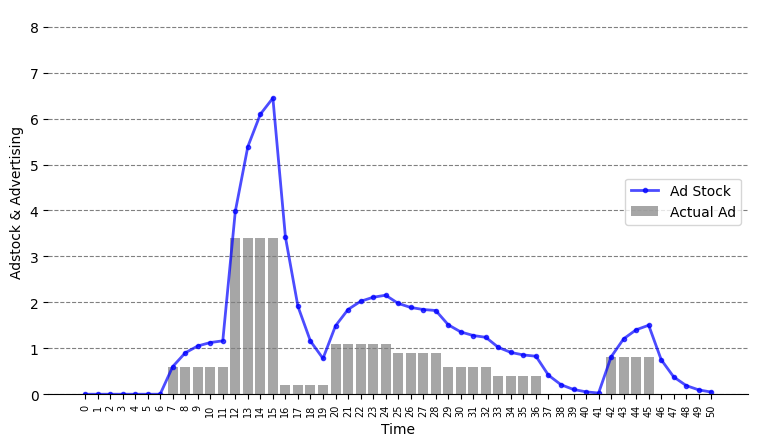

In [97]:
#Adstock rate =.5 
advertising=ConsumerElectronics_camera_full['Content_marketing']
adstocked_Content_marketing=ConsumerElectronics_camera_full['Adstock_Content_marketing']
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
plt.subplots_adjust(left=0.2, bottom=None, right=None, top=None, wspace=None, hspace=None)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.grid(b=False, which='major', color='gray', linestyle='--')
ax.set_ylim([0, 1.3*max(adstocked_Content_marketing)])
bar = ax.bar(np.arange(len(advertising)), advertising, width=0.8, color='gray', alpha=0.7, label='Actual Ad')
line = ax.plot(np.arange(len(advertising)), adstocked_Content_marketing, 
               marker='o', markersize=3, linestyle='-', linewidth=2, color='blue', alpha=0.7, label='Ad Stock')
ax.set_xlabel('Time')
ax.set_ylabel('Adstock & Advertising')
ax.annotate("Advertising Adstock Transformation", (np.mean(np.arange(len(advertising))), 100),
            verticalalignment='bottom', horizontalalignment='center',
            fontsize=15, color='#681963')
ax.set_xticks(np.arange(len(advertising)))
ax.set_xticklabels(labels=np.arange(len(advertising)), minor=False, fontsize=7, rotation=90)
ax.legend(loc='center right')  
plt.show()

C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\1614033953.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.yaxis.grid(b=False, which='major', color='gray', linestyle='--')
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\1614033953.py:10: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.yaxis.grid(b=False, which='major', color='gray', linestyle='--')


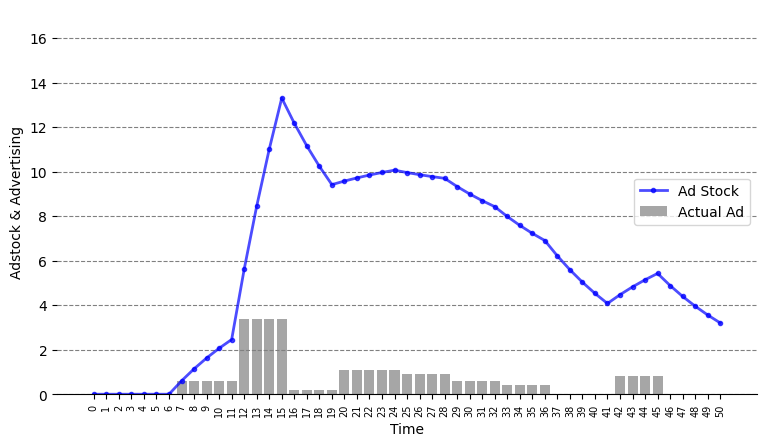

In [98]:
ConsumerElectronics_camera_full['Adstock_Content_marketing'] = adstocked_advertising(adstock_rate=0.9, advertising=ConsumerElectronics_camera_full['Content_marketing'])
#Adstock rate =.9
advertising=ConsumerElectronics_camera_full['Content_marketing']
adstocked_Content_marketing=ConsumerElectronics_camera_full['Adstock_Content_marketing']
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
plt.subplots_adjust(left=0.2, bottom=None, right=None, top=None, wspace=None, hspace=None)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.grid(b=False, which='major', color='gray', linestyle='--')
ax.set_ylim([0, 1.3*max(adstocked_Content_marketing)])
bar = ax.bar(np.arange(len(advertising)), advertising, width=0.8, color='gray', alpha=0.7, label='Actual Ad')
line = ax.plot(np.arange(len(advertising)), adstocked_Content_marketing, 
               marker='o', markersize=3, linestyle='-', linewidth=2, color='blue', alpha=0.7, label='Ad Stock')
ax.set_xlabel('Time')
ax.set_ylabel('Adstock & Advertising')
ax.annotate("Advertising Adstock Transformation", (np.mean(np.arange(len(advertising))), 100),
            verticalalignment='bottom', horizontalalignment='center',
            fontsize=15, color='#681963')
ax.set_xticks(np.arange(len(advertising)))
ax.set_xticklabels(labels=np.arange(len(advertising)), minor=False, fontsize=7, rotation=90)
ax.legend(loc='center right')  
plt.show()

In [99]:
#Computing Moving average to the sales data to evaluate any important features
ConsumerElectronics_camera_full['ma2_Units']=ConsumerElectronics_camera_full['units'].rolling(window=2).mean()
ConsumerElectronics_camera_full['ma3_Units']=ConsumerElectronics_camera_full['units'].rolling(window=3).mean()

ConsumerElectronics_camera_full['ma2_discount_offered']=ConsumerElectronics_camera_full['discount_offered'].rolling(window=2).mean()
ConsumerElectronics_camera_full['ma3_discount_offered']=ConsumerElectronics_camera_full['discount_offered'].rolling(window=3).mean()

In [100]:
#Taking a backup copy of the master dataset
ConsumerElectronics_camera_full.shape
ConsumerElectronics_camera_full_bckup=ConsumerElectronics_camera_full

In [101]:
#Creating the lag variables for nps, holiday, discounts
dis_off=pd.concat([ConsumerElectronics_camera_full['discount_offered'].shift(-1), ConsumerElectronics_camera_full['discount_offered'].shift(-2)], axis=1)
dis_off.columns= ['lag1_discount_offered','lag2_discount_offered']

nps_dtl=pd.concat([ConsumerElectronics_camera_full['nps'].shift(-1), ConsumerElectronics_camera_full['nps'].shift(-2)], axis=1)
nps_dtl.columns= ['lag1_nps','lag2_nps']

holiday_dtl=pd.concat([ConsumerElectronics_camera_full['holiday_flag'].shift(-1), ConsumerElectronics_camera_full['holiday_flag'].shift(-2)], axis=1)
holiday_dtl.columns= ['lag1_holiday','lag2_holiday']

In [102]:
#Adding the lag variables to the dataset
ConsumerElectronics_camera_full=pd.concat([ConsumerElectronics_camera_full.reset_index(drop=True),dis_off],axis=1)
ConsumerElectronics_camera_full=pd.concat([ConsumerElectronics_camera_full.reset_index(drop=True),nps_dtl],axis=1)
ConsumerElectronics_camera_full=pd.concat([ConsumerElectronics_camera_full.reset_index(drop=True),holiday_dtl],axis=1)

In [103]:
ConsumerElectronics_camera_full.head()

,list_price,gmv,units,sla,discount_offered,product_procurement_sla,Year,Month,week_year,Content_marketing,Digital,nps,Sponsorship,Stock_Index,Total_investment,TV,Cool_DegDays,Heat_DegDays,Max_Temp,SnowonGrnd,TotalPrecip,TotalSnow,prepaid_perc,pay_flag,holiday_flag,Adstock_Content_marketing,Adstock_Digital,Adstock_TV,ma2_Units,ma3_Units,ma2_discount_offered,ma3_discount_offered,lag1_discount_offered,lag2_discount_offered,lag1_nps,lag2_nps,lag1_holiday,lag2_holiday
0,1352.95,1370.80,1.05,7.05,0.46,2.75,2015.00,7.00,28,0.00,2.50,54.60,7.40,1177,17.10,0.20,2.38,0.28,24.83,0.00,4.42,0.00,0.34,0.00,0.00,0.00,2.50,0.20,NaN,NaN,NaN,NaN,0.46,0.45,54.60,54.60,1.00,0.00
1,1465.56,1484.06,1.03,6.38,0.46,2.78,2015.00,7.00,29,0.00,2.50,54.60,7.40,1177,17.10,0.20,5.18,0.00,28.75,0.00,1.40,0.00,0.34,1.00,1.00,0.00,3.75,0.30,1.04,NaN,0.46,NaN,0.45,0.44,54.60,54.60,0.00,0.00
2,1419.59,1449.31,1.04,6.41,0.45,2.83,2015.00,7.00,30,0.00,2.50,54.60,7.40,1177,17.10,0.20,5.06,0.00,29.75,0.00,0.90,0.00,0.33,0.00,0.00,0.00,4.38,0.35,1.04,1.04,0.45,0.46,0.44,0.52,54.60,60.00,0.00,0.00
3,1435.37,1456.43,1.05,6.38,0.44,2.79,2015.00,7.00,31,0.00,2.50,54.60,7.40,1177,17.10,0.20,6.57,0.00,31.58,0.00,4.63,0.00,0.31,1.00,0.00,0.00,4.69,0.38,1.04,1.04,0.45,0.45,0.52,0.85,60.00,60.00,0.00,1.00
4,699.00,699.00,1.00,5.00,0.52,4.00,2015.00,8.00,32,0.00,1.30,60.00,1.10,1206,5.10,0.00,3.65,0.00,27.20,0.00,0.28,0.00,0.00,0.00,0.00,0.00,3.64,0.19,1.02,1.03,0.48,0.47,0.85,0.44,60.00,60.00,1.00,1.00


In [104]:
#nan treatment in the dataset
ConsumerElectronics_camera_full=ConsumerElectronics_camera_full.replace(np.nan, 0)

In [105]:
#Dropping variables with high multi-collinearity
corr = ConsumerElectronics_camera_full.corr()
corr.style.background_gradient(cmap='coolwarm')

,list_price,gmv,units,sla,discount_offered,product_procurement_sla,Year,Month,week_year,Content_marketing,Digital,nps,Sponsorship,Stock_Index,Total_investment,TV,Cool_DegDays,Heat_DegDays,Max_Temp,SnowonGrnd,TotalPrecip,TotalSnow,prepaid_perc,pay_flag,holiday_flag,Adstock_Content_marketing,Adstock_Digital,Adstock_TV,ma2_Units,ma3_Units,ma2_discount_offered,ma3_discount_offered,lag1_discount_offered,lag2_discount_offered,lag1_nps,lag2_nps,lag1_holiday,lag2_holiday
list_price,1.000000,0.999891,0.698232,0.035372,-0.643482,0.508970,-0.303679,0.343664,-0.168075,0.222579,0.154289,-0.581577,0.327615,-0.326537,0.342039,0.200322,-0.085254,0.115712,-0.120804,-0.027681,-0.063425,-0.110366,-0.053898,-0.114646,-0.049523,0.257925,0.149357,0.155991,-0.057966,-0.162470,-0.514634,-0.403804,-0.256157,-0.031778,-0.254428,-0.105134,-0.095734,0.049209
gmv,0.999891,1.000000,0.706009,0.035436,-0.644224,0.509512,-0.305669,0.345021,-0.170084,0.224510,0.157958,-0.582024,0.330789,-0.324469,0.343362,0.198631,-0.082102,0.111808,-0.116630,-0.029474,-0.065195,-0.108371,-0.053397,-0.113839,-0.051348,0.255021,0.152504,0.153814,-0.058094,-0.162489,-0.515431,-0.404110,-0.258281,-0.032380,-0.255167,-0.106288,-0.096046,0.048646
units,0.698232,0.706009,1.000000,0.056170,-0.504964,0.362638,-0.262810,0.247417,-0.200054,0.163895,0.211857,-0.397948,0.304385,-0.116628,0.226120,0.030822,0.147928,-0.100636,0.120056,-0.079624,0.042606,0.016340,0.030403,0.037645,-0.069800,0.021632,0.193843,-0.029619,-0.239991,-0.255182,-0.570944,-0.393640,-0.227452,0.064305,-0.062344,-0.031864,-0.129450,-0.052699
sla,0.035372,0.035436,0.056170,1.000000,-0.413593,-0.154653,-0.360330,0.163581,-0.452093,0.149781,0.188917,0.097731,-0.023508,-0.081800,-0.008484,-0.078260,0.032520,0.041377,-0.068403,0.097795,0.006155,-0.029813,-0.072893,0.008135,0.248467,-0.000980,0.192679,-0.142442,-0.209247,-0.184440,-0.160417,-0.164762,-0.194496,-0.007653,0.011997,0.054238,0.021162,-0.001174
discount_offered,-0.643482,-0.644224,-0.504964,-0.413593,1.000000,-0.604743,0.214312,-0.151417,0.212097,-0.137775,-0.140135,0.292195,-0.121591,0.216770,-0.170096,-0.178490,0.154561,-0.192261,0.190438,-0.046413,0.012197,-0.057348,-0.119278,0.168347,0.071214,-0.214205,-0.156002,-0.126697,0.080862,0.141943,0.495365,0.350189,0.068298,0.017115,0.150939,-0.016149,0.130628,-0.049561
product_procurement_sla,0.508970,0.509512,0.362638,-0.154653,-0.604743,1.000000,-0.316060,0.253688,-0.301547,0.227848,0.219925,-0.280844,0.235712,-0.102558,0.231574,0.102913,-0.099770,-0.027579,-0.013122,-0.046272,-0.081425,-0.051808,-0.101116,-0.087889,-0.173859,0.110174,0.263783,0.069993,-0.016431,-0.062432,-0.462470,-0.301536,0.297830,0.002277,-0.030693,0.110550,0.042879,0.277439
Year,-0.303679,-0.305669,-0.262810,-0.360330,0.214312,-0.316060,1.000000,-0.869049,0.863486,-0.283073,-0.397074,0.048920,-0.361040,0.072013,-0.170700,0.102929,-0.213553,0.356696,-0.257126,0.210775,0.103823,0.213991,0.211649,-0.057188,-0.141784,0.130364,-0.454005,0.193369,0.130067,0.197124,0.265537,0.299487,0.031140,-0.062902,-0.073185,-0.129827,-0.141784,-0.099955
Month,0.343664,0.345021,0.247417,0.163581,-0.151417,0.253688,-0.869049,1.000000,-0.504440,0.292069,0.390897,-0.245048,0.515874,-0.004006,0.284627,-0.013934,0.119091,-0.384563,0.270371,-0.316110,-0.161933,-0.281561,-0.194285,0.055961,0.067931,0.020397,0.466983,-0.067955,-0.005637,-0.018049,-0.114482,-0.091478,-0.084272,-0.078107,-0.119008,-0.089839,0.030678,-0.037538
week_year,-0.168075,-0.170084,-0.200054,-0.452093,0.212097,-0.301547,0.863486,-0.504440,1.000000,-0.193386,-0.293495,-0.166205,-0.107263,0.120508,-0.007941,0.161331,-0.246122,0.231461,-0.172750,0.047507,0.014573,0.081844,0.155845,-0.053665,-0.179722,0.249292,-0.316221,0.265446,0.233767,0.336248,0.357212,0.436918,-0.052937,-0.194220,-0.268625,-0.338613,-0.225926,-0.195639
Content_marketing,0.222579,0.224510,0.163895,0.149781,-0.137775,0.227848,-0.283073,0.292069,-0.193386,1.000000,0.898393,-0.622478,0.716755,-0.078162,0.859748,0.368012,-0.350060,0.081

In [106]:
#Removing rejected variables based on the profiling/correlation plot
ConsumerElectronics_camera_full = ConsumerElectronics_camera_full.drop(columns=['Digital','TV', 'list_price', 'ma2_discount_offered','ma3_discount_offered','ma3_Units','Month','Year'])

In [107]:
### Creating a backup data
ConsumerElectronics_camera_full_bkp = ConsumerElectronics_camera_full.copy(deep=True)

In [108]:
ConsumerElectronics_camera_full = ConsumerElectronics_camera_full.drop(columns=['week_year', 'units'])

In [109]:
# Get column names first
names = ConsumerElectronics_camera_full.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(ConsumerElectronics_camera_full)
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [110]:
#Building a basic linear reg model on the analytical dataset
lreg = LinearRegression()
X=scaled_df.drop(columns=['gmv'])
x_train, x_cv, y_train, y_cv = train_test_split(X,scaled_df.gmv)
lreg.fit(x_train,y_train)
pred = lreg.predict(x_cv)

In [111]:
mse = np.mean((pred - y_cv)**2)
# calculating coefficients
coeff = DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
coeff

,0,Coefficient Estimate
0,sla,0.32
1,discount_offered,0.89
2,product_procurement_sla,1.25
3,Content_marketing,2.33
4,nps,-1.23
5,Sponsorship,0.11
6,Stock_Index,-0.57
7,Total_investment,-3.11
8,Cool_DegDays,0.69
9,Heat_DegDays,0.81


In [112]:
lreg.score(x_cv,y_cv)

-6.1203709115434455

In [113]:
#Alternate way of computing all the model statistics easily using sm.OLS
model = sm.OLS(y_train,x_train)
results = model.fit()
results.params
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.804
Method:                 Least Squares   F-statistic:                              6.782
Date:                Thu, 15 Dec 2022   Prob (F-statistic):                    0.000983
Time:                        14:19:11   Log-Likelihood:                         -1.4173
No. Observations:                  38   AIC:                                      56.83
Df Residuals:                      11   BIC:                                      101.0
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [114]:
predictions = results.predict(x_cv)
predictions

25    1.53
38    0.56
50    0.60
42    0.69
19    1.71
33   -1.84
22    0.39
13    1.84
1    -1.02
27    2.05
43   -1.14
34   -1.64
17    0.01
dtype: float64

In [115]:
#Initial RMSE
math.sqrt(np.mean(np.square((predictions-y_cv))))

1.3884555433900512

In [116]:
#handling multicollinearity
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
rfe = RFE(lm, step = 10)             # running RFE
rfe = rfe.fit(x_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[False False  True  True  True False  True  True False False False  True
 False False  True False False False False  True False  True  True  True
  True False  True]
[3 2 1 1 1 3 1 1 2 2 3 1 3 3 1 2 3 3 3 1 3 1 1 1 1 3 1]


In [117]:
x_rfe = x_train[x_train.columns[rfe.support_]]
model_rfe = sm.OLS(y_train,x_rfe)
results_rfe = model_rfe.fit()
results_rfe.params
print(results_rfe.summary())

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.862
Model:                            OLS   Adj. R-squared (uncentered):              0.790
Method:                 Least Squares   F-statistic:                              11.99
Date:                Thu, 15 Dec 2022   Prob (F-statistic):                    1.11e-07
Time:                        14:19:11   Log-Likelihood:                         -18.356
No. Observations:                  38   AIC:                                      62.71
Df Residuals:                      25   BIC:                                      84.00
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [118]:
#Stepwise variable elimination method for linear regression with in and out p-value thresholds implementation
def stepwise_selection(X, y, 
                       #initial_list=['SLA','Adstock_Content_marketing','Adstock_Digital','Adstock_TV'], 
                       initial_list = ['sla', 'discount_offered', 'product_procurement_sla', 'Content_marketing', 'nps', 
                                       'Sponsorship', 'Stock_Index', 'Total_investment', 'Cool_DegDays', 'Heat_DegDays', 
                                       'Max_Temp', 'SnowonGrnd', 'TotalPrecip', 'TotalSnow', 'prepaid_perc', 'pay_flag',
                                       'holiday_flag', 'Adstock_Content_marketing', 'Adstock_Digital', 'Adstock_TV',
                                       'ma2_Units', 'lag1_discount_offered', 'lag2_discount_offered', 'lag1_nps',
                                       'lag2_nps', 'lag1_holiday', 'lag2_holiday'],
                       threshold_in=0.001, 
                       threshold_out = 0.1, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            del included[worst_feature]
            #included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [119]:
#Computing the best model automatically
result = stepwise_selection(x_train, y_train)
print('resulting features:')
print(result)

Drop                              5 with p-value 0.901041
Drop                              9 with p-value 0.871112
Drop                             15 with p-value 0.835195
Drop                             11 with p-value 0.703237
Drop                             19 with p-value 0.349778


C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype exp

Drop                             15 with p-value 0.289985
Drop                             14 with p-value 0.424286
Drop                             13 with p-value 0.130683
Drop                              0 with p-value 0.158776
Drop                              0 with p-value 0.117079


C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype exp

Drop                              9 with p-value 0.252422
Drop                              1 with p-value 0.322319
Drop                              3 with p-value 0.553257


C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype exp

Drop                             13 with p-value 0.29613
Drop                              2 with p-value 0.283372
Drop                              4 with p-value 0.265052
resulting features:
['product_procurement_sla', 'nps', 'Cool_DegDays', 'Heat_DegDays', 'TotalPrecip', 'pay_flag', 'ma2_Units', 'lag1_discount_offered', 'lag2_discount_offered', 'lag2_nps', 'lag1_holiday']


C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


In [120]:
#Subsetting the data based on the above automatic determination of final variables for the model
x_train1=x_train.loc[:,[ 'discount_offered', 'Content_marketing', 'Sponsorship', 'Total_investment', 'Cool_DegDays', 'Heat_DegDays', 'prepaid_perc', 'lag1_discount_offered']]

In [121]:
#On the shortlisted data obtaining the final model statistics
model = sm.OLS(y_train,x_train1)
results = model.fit()
results.params
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.609
Model:                            OLS   Adj. R-squared (uncentered):              0.504
Method:                 Least Squares   F-statistic:                              5.836
Date:                Thu, 15 Dec 2022   Prob (F-statistic):                    0.000160
Time:                        14:19:12   Log-Likelihood:                         -38.126
No. Observations:                  38   AIC:                                      92.25
Df Residuals:                      30   BIC:                                      105.4
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [122]:
#Predicting on the test data
x_cv2=x_cv.loc[:,['discount_offered', 'Content_marketing', 'Sponsorship', 'Total_investment', 'Cool_DegDays', 'Heat_DegDays', 'prepaid_perc', 'lag1_discount_offered']]
#results.predict(x_cv2)

In [123]:
#RMSE
math.sqrt(np.mean(np.square((results.predict(x_cv2)-y_cv))))

0.6945990280108667

In [124]:
#MSE
mse = np.mean((results.predict(x_cv2) - y_cv)**2)
mse

0.4824678097136407

In [125]:
#Koyck Model (Lag 1 of GMV)
ConsumerElectronics_camera_full['GMV_1']=ConsumerElectronics_camera_full['gmv'].shift(-1)
ConsumerElectronics_camera_full=ConsumerElectronics_camera_full.fillna(0)

# Get column names first
names = ConsumerElectronics_camera_full.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(ConsumerElectronics_camera_full)
scaled_df = pd.DataFrame(scaled_df, columns=names)

X=scaled_df.drop(columns=['gmv'])
x_train, x_cv, y_train, y_cv = train_test_split(X,scaled_df.gmv)

#Computing the best model automatically
result = stepwise_selection(x_train, y_train)
print('resulting features:')
print(result)

Drop                             25 with p-value 0.969703
Drop                             24 with p-value 0.918316
Drop                             10 with p-value 0.878926

C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype exp


Drop                             10 with p-value 0.787066
Drop                             22 with p-value 0.734046


C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Drop                             14 with p-value 0.807489
Drop                             15 with p-value 0.767001
Drop                              6 with p-value 0.696808
Drop                              2 with p-value 0.422576


C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Drop                             11 with p-value 0.247127
Drop                             15 with p-value 0.303685
Drop                              6 with p-value 0.333309

C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)



Drop                             11 with p-value 0.530048


C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Drop                              2 with p-value 0.646804
Drop                              7 with p-value 0.342785
Drop                              4 with p-value 0.38838


C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype exp

Drop                              3 with p-value 0.462799
Drop                              3 with p-value 0.396091
Drop                              4 with p-value 0.357757
Drop                              5 with p-value 0.2795
resulting features:
['sla', 'discount_offered', 'nps', 'TotalPrecip', 'Adstock_Content_marketing', 'lag1_discount_offered', 'lag1_nps']


C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


In [126]:
#Subsetting the data based on the above automatic determination of final variables for the model
x_train1=x_train.loc[:,['sla', 'discount_offered', 'Content_marketing', 'nps', 'Sponsorship', 'Total_investment', 'Max_Temp', 'prepaid_perc', 'Adstock_Digital', 'Adstock_TV', 'lag2_discount_offered', 'lag1_nps', 'lag2_holiday']]
#On the shortlisted data obtaining the final model statistics
model = sm.OLS(y_train,x_train1)
results = model.fit()
results.params
print(results.summary())
#Predicting on the test data
x_cv2=x_cv.loc[:,['sla', 'discount_offered', 'Content_marketing', 'nps', 'Sponsorship', 'Total_investment', 'Max_Temp', 'prepaid_perc', 'Adstock_Digital', 'Adstock_TV', 'lag2_discount_offered', 'lag1_nps', 'lag2_holiday']]
#results.predict(x_cv2)

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.691
Model:                            OLS   Adj. R-squared (uncentered):              0.531
Method:                 Least Squares   F-statistic:                              4.307
Date:                Thu, 15 Dec 2022   Prob (F-statistic):                    0.000858
Time:                        14:19:14   Log-Likelihood:                         -34.317
No. Observations:                  38   AIC:                                      94.63
Df Residuals:                      25   BIC:                                      115.9
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [127]:
#Distributed Lag Models
ConsumerElectronics_camera_full['GMV_1']=ConsumerElectronics_camera_full['gmv'].shift(-1)
ConsumerElectronics_camera_full['GMV_2']=ConsumerElectronics_camera_full['gmv'].shift(-2)
ConsumerElectronics_camera_full['GMV_3']=ConsumerElectronics_camera_full['gmv'].shift(-3)
ConsumerElectronics_camera_full=ConsumerElectronics_camera_full.fillna(0)

# Get column names first
names = ConsumerElectronics_camera_full.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(ConsumerElectronics_camera_full)
scaled_df = pd.DataFrame(scaled_df, columns=names)

X=scaled_df.drop(columns=['gmv'])
x_train, x_cv, y_train, y_cv = train_test_split(X,scaled_df.gmv)

#Computing the best model automatically
result = stepwise_selection(x_train, y_train)
print('resulting features:')
print(result)

Drop                              4 with p-value 0.988474
Drop                             24 with p-value 0.988557


C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Drop                              3 with p-value 0.87355


C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Drop                             23 with p-value 0.78799
Drop                             14 with p-value 0.776804


C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Drop                             21 with p-value 0.680517
Drop                             15 with p-value 0.543087


C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype exp

Drop                             11 with p-value 0.487385
Drop                             15 with p-value 0.459242
Drop                              6 with p-value 0.224339


C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Drop                             10 with p-value 0.489902


C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Drop                              0 with p-value 0.397154


C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Drop                              8 with p-value 0.375715


C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Drop                             11 with p-value 0.305392
Drop                             12 with p-value 0.175671


C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Drop                             11 with p-value 0.119485
resulting features:
['discount_offered', 'product_procurement_sla', 'Sponsorship', 'Stock_Index', 'Total_investment', 'Heat_DegDays', 'Max_Temp', 'SnowonGrnd', 'pay_flag', 'Adstock_Content_marketing', 'Adstock_TV']


C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


In [128]:
#Subsetting the data based on the above automatic determination of final variables for the model
x_train1=x_train.loc[:,['sla', 'discount_offered', 'product_procurement_sla', 'Content_marketing', 'nps', 'Sponsorship', 'Total_investment', 'Heat_DegDays', 'prepaid_perc', 'Adstock_Content_marketing', 'Adstock_TV', 'lag1_discount_offered', 'lag1_nps','GMV_1']]
#On the shortlisted data obtaining the final model statistics
model = sm.OLS(y_train,x_train1)
results = model.fit()
results.params
print(results.summary())
#Predicting on the test data
x_cv2=x_cv.loc[:,['sla', 'discount_offered', 'product_procurement_sla', 'Content_marketing', 'nps', 'Sponsorship', 'Total_investment', 'Heat_DegDays', 'prepaid_perc', 'Adstock_Content_marketing', 'Adstock_TV', 'lag1_discount_offered', 'lag1_nps','GMV_1']]
results.predict(x_cv2)


                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.848
Model:                            OLS   Adj. R-squared (uncentered):              0.759
Method:                 Least Squares   F-statistic:                              9.531
Date:                Thu, 15 Dec 2022   Prob (F-statistic):                    1.18e-06
Time:                        14:19:15   Log-Likelihood:                         -17.262
No. Observations:                  38   AIC:                                      62.52
Df Residuals:                      24   BIC:                                      85.45
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

34    0.08
26   -0.40
47   -0.38
13   -0.78
36   -0.00
6     0.88
37   -0.65
46   -0.19
33    0.23
0     0.57
21    0.48
27   -0.20
38   -1.10
dtype: float64

In [129]:
#RMSE
rmse=math.sqrt(np.mean(np.square((results.predict(x_cv2)-y_cv))))
rmse

1.2231376531378908

In [130]:
#MSE
mse = np.mean((results.predict(x_cv2) - y_cv)**2)
mse

1.4960657185236674

In [131]:
#Exponential/Multiplicative Models
ConsumerElectronics_camera_full=np.log(ConsumerElectronics_camera_full)
ConsumerElectronics_camera_full=ConsumerElectronics_camera_full.fillna(0)
ConsumerElectronics_camera_full=ConsumerElectronics_camera_full.replace([np.inf, -np.inf], 0)

# Get column names first
names = ConsumerElectronics_camera_full.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(ConsumerElectronics_camera_full)
scaled_df = pd.DataFrame(scaled_df, columns=names)

X=scaled_df.drop(columns=['gmv'])
x_train, x_cv, y_train, y_cv = train_test_split(X,scaled_df.gmv)

x_train, x_cv, y_train, y_cv = train_test_split(X,ConsumerElectronics_camera_full.gmv)

C:\Users\gaura\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\gaura\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [132]:
#Computing the best model automatically
result = stepwise_selection(x_train, y_train)
print('resulting features:')
print(result)

C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype exp

Drop                             12 with p-value 0.981882
Drop                              0 with p-value 0.967678
Drop                             17 with p-value 0.912899


C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Drop                              8 with p-value 0.797371
Drop                              9 with p-value 0.562376
Drop                              0 with p-value 0.338875


C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Drop                              4 with p-value 0.41295
Drop                              9 with p-value 0.579444


C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Drop                              8 with p-value 0.406466
Drop                              8 with p-value 0.742167


C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Drop                             10 with p-value 0.263832
Drop                              5 with p-value 0.293919
Drop                              7 with p-value 0.410132


C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Drop                              1 with p-value 0.153052
Drop                             10 with p-value 0.150295
Drop                              6 with p-value 0.111317


C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18996\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


resulting features:
['product_procurement_sla', 'nps', 'Sponsorship', 'Total_investment', 'Max_Temp', 'TotalSnow', 'lag1_discount_offered', 'lag2_discount_offered', 'lag1_nps', 'lag1_holiday', 'lag2_holiday']


In [133]:
#Subsetting the data based on the above automatic determination of final variables for the model
x_train1=x_train.loc[:,['discount_offered', 'Content_marketing', 'Sponsorship', 'Stock_Index', 'Total_investment', 'Cool_DegDays', 'Max_Temp', 'Adstock_Digital', 'Adstock_TV', 'lag1_holiday']]
#On the shortlisted data obtaining the final model statistics
model = sm.OLS(y_train,x_train1)
results = model.fit()
results.params
print(results.summary())
#Predicting on the test data
x_cv2=x_cv.loc[:,['discount_offered', 'Content_marketing', 'Sponsorship', 'Stock_Index', 'Total_investment', 'Cool_DegDays', 'Max_Temp', 'Adstock_Digital', 'Adstock_TV', 'lag1_holiday']]
results.predict(x_cv2)


                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.122
Model:                            OLS   Adj. R-squared (uncentered):             -0.150
Method:                 Least Squares   F-statistic:                             0.4477
Date:                Thu, 15 Dec 2022   Prob (F-statistic):                       0.897
Time:                        14:19:17   Log-Likelihood:                         -125.79
No. Observations:                  38   AIC:                                      269.6
Df Residuals:                      29   BIC:                                      284.3
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

C:\Users\gaura\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


15    -2.33
5    -25.41
46    -3.00
37     2.23
40     0.66
30     4.03
42    -3.02
13    -6.51
34     0.83
1      0.58
11    -7.08
28     6.98
50     0.37
dtype: float64

In [134]:
#RMSE
rmse=math.sqrt(np.mean(np.square((results.predict(x_cv2)-y_cv))))
rmse

11.889687864438262

In [135]:
#MSE
mse = np.mean((results.predict(x_cv2) - y_cv)**2)
mse

141.3646775137705

<AxesSubplot: xlabel='gmv', ylabel='discount_offered'>

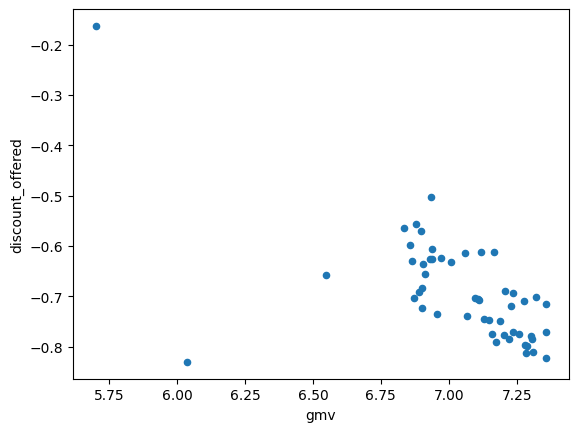

In [136]:
ConsumerElectronics_camera_full.plot.scatter('gmv','discount_offered')

<AxesSubplot: xlabel='gmv', ylabel='prepaid_perc'>

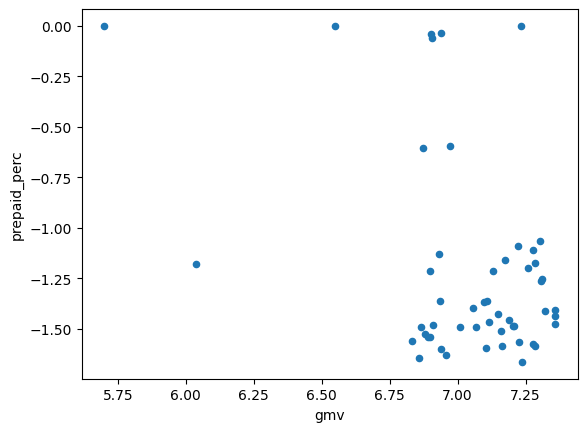

In [137]:
ConsumerElectronics_camera_full.plot.scatter('gmv','prepaid_perc')

<AxesSubplot: xlabel='gmv', ylabel='sla'>

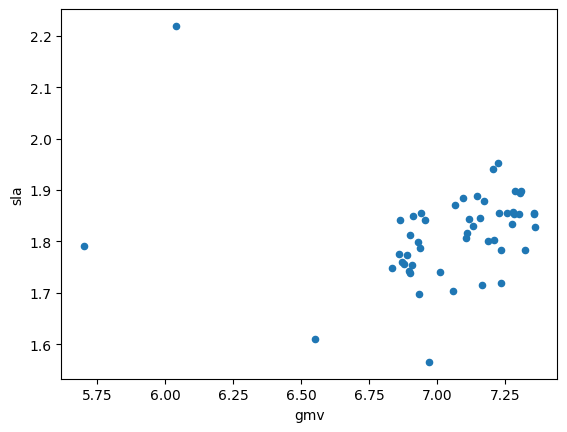

In [138]:
ConsumerElectronics_camera_full.plot.scatter('gmv','sla')

<AxesSubplot: xlabel='gmv', ylabel='Adstock_Content_marketing'>

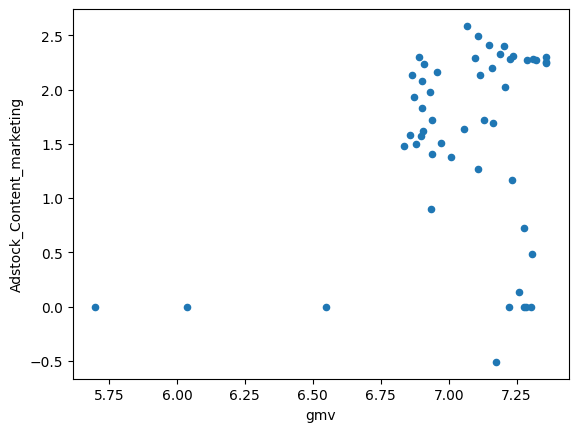

In [139]:
ConsumerElectronics_camera_full.plot.scatter('gmv','Adstock_Content_marketing')

In [140]:
#Outlier Treatments creating function for identifing lower and upper range
%matplotlib inline
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3-Q1
 lower_range = Q1-(1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [141]:
lowerbound,upperbound = outlier_treatment(ConsumerElectronics_camera_full.Adstock_Content_marketing)
lowerbound,upperbound

(-0.355640986057449, 3.838345021106268)

In [142]:
lowerbound,upperbound = outlier_treatment(ConsumerElectronics_camera_full.discount_offered)
lowerbound,upperbound

(-0.9901234669930696, -0.411089723994746)

In [143]:
lowerbound,upperbound = outlier_treatment(ConsumerElectronics_camera_full.sla)
lowerbound,upperbound

(1.6330295949253433, 1.9882013415599316)

In [144]:
lowerbound,upperbound = outlier_treatment(ConsumerElectronics_camera_full.prepaid_perc)
lowerbound,upperbound

(-2.0488788415081216, -0.6374609003809532)

In [145]:
#Range identification and manually deciding the cut off
lower_range=0.09
upper_range=0.6
ConsumerElectronics_camera_full.prepaid_perc[(ConsumerElectronics_camera_full.prepaid_perc < lower_range)|(ConsumerElectronics_camera_full.prepaid_perc > upper_range)]

0    -1.09
1    -1.07
2    -1.11
3    -1.17
4     0.00
5     0.00
6    -1.18
7    -1.16
8    -1.20
9    -1.26
10   -1.58
11   -1.36
12   -1.21
13   -1.47
14   -1.49
15   -1.49
16   -1.37
17   -1.43
18   -1.46
19   -1.44
20   -1.41
21   -1.41
22   -1.26
23   -1.48
24   -1.67
25   -1.54
26   -1.37
27   -1.57
28   -1.59
29   -1.48
30   -1.51
31   -1.63
32   -1.49
33   -1.22
34   -1.49
35   -1.13
36   -0.61
37   -0.04
38   -0.04
39   -0.06
40   -0.59
41   -1.60
42   -1.53
43   -1.54
44   -1.40
45   -1.59
46   -1.64
47   -1.56
48   -1.49
49   -1.60
50    0.00
Name: prepaid_perc, dtype: float64

In [146]:
#outlier Treatment
ConsumerElectronics_camera_full.prepaid_perc[(ConsumerElectronics_camera_full.prepaid_perc < lower_range) ]=lower_range
ConsumerElectronics_camera_full.prepaid_perc[(ConsumerElectronics_camera_full.prepaid_perc > upper_range)]=upper_range

In [147]:
#post Treatment
ConsumerElectronics_camera_full.prepaid_perc[(ConsumerElectronics_camera_full.prepaid_perc < lower_range)|(ConsumerElectronics_camera_full.prepaid_perc > upper_range)]

Series([], Name: prepaid_perc, dtype: float64)

In [148]:
#Regularization implementation - advanced modeling
## training the model on ridge reg
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(x_train,y_train)
pred = ridgeReg.predict(x_cv)
mse = np.mean((pred - y_cv)**2)
mse

C:\Users\gaura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


2.9849145854957326

In [149]:
ridgeReg.coef_

array([-0.04375563, -0.06271967,  0.19118527,  0.0089566 , -0.06990475,
        0.09745027,  0.02281719, -0.00237812,  0.02681879, -0.01240092,
       -0.05935284,  0.00430154,  0.00384052, -0.04639529, -0.04955786,
        0.        ,  0.        ,  0.02893737, -0.00947268, -0.02380753,
        0.00066341, -0.05782272,  0.07039674,  0.50204187,  0.03412805,
        0.        ,  0.        ,  0.28430076,  0.01391287,  0.01849398])

In [150]:
#training model using lasso reg
lassoReg = Lasso(alpha=.05, normalize=True)
lassoReg.fit(x_train,y_train)
pred = lassoReg.predict(x_cv)

# calculating mse
mse = np.mean((pred - y_cv)**2)
mse
lassoReg.score(x_cv,y_cv)

C:\Users\gaura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


-0.06112215736856341

In [151]:
lassoReg.coef_

array([-0., -0.,  0., -0., -0.,  0., -0.,  0.,  0.,  0., -0., -0.,  0.,
       -0., -0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0., -0.,  0.,
        0.,  0.,  0., -0.])

In [152]:
#traning the model on elastic net reg
ENreg = ElasticNet(alpha=.1, l1_ratio=0.5, normalize=False)
ENreg.fit(x_train,y_train)
pred_cv = ENreg.predict(x_cv)

#calculating mse
mse = np.mean((pred - y_cv)**2)
mse

C:\Users\gaura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


0.16666172564667298

In [153]:
ENreg.coef_

array([-0.        , -0.        ,  0.00838756, -0.        , -0.07998344,
        0.02053778, -0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.04438196, -0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ])